# Perceptron Algorithm
Source Code: [perceptron.py](https://github.com/KatieMacalintal/KatieMacalintal.github.io/blob/main/posts/perceptron/perceptron.py)

## Implementation

In our Perceptron class, we implemented a `fit(X, y)` algorithm, which finds the variables of weights, `w`, that linearly separates `X`, a data set of observations and their features according to their labels `y`. In this method, we first start with a random value for `w`. Then while we haven't reached a 100% classification rate and have not exceeded the maximum number of steps, we continue to tweak our `w` depending on if it was able to correctly classify a random point `i` in our data set `X`. 

The update of our weights, `w`, is seen on line 45 of our `perceptron.py` code. It is equivalent to the following math equation ... $$\tilde{w}^{(t+1)} = \tilde{w}^{(t)} + \mathbb{1}(\tilde{y}_i {\langle \tilde{w}^{(t)}, \tilde{x}_i\rangle} < 0)\tilde{y}_i \tilde{x}_i$$ 

This equation only updates `w` when our prediction for the label of $\tilde{x}_i$, the randomly selected data point, is incorrect. This is indicated through the $\mathbb{1}(\tilde{y}_i {\langle \tilde{w}^{(t)}, \tilde{x}_i\rangle} < 0)$ portion of the equation, for it will evaulate to 0 when our `w` does classify the point correctly and the calcuations will not affect $\tilde{w}^{(t+1)}$, our `w` in the next iteration. When the indicator evaulates to 1, meaning our predication was incorrect, then our `w` is incremented by $\tilde{y}_i \tilde{x}_i$. This moves our linear separator in the right direction, so that our randomly selected point could be classified correctly on the next iteration if it were selected. 

## Experiments

Before we conduct any experiments, we need to import and define relevant extensions, classes, and functions.

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from perceptron import Perceptron

np.random.seed(12345)

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

### Linearly Separable 2D Data 
Here is a data set of two distinct groups with 2 features. 

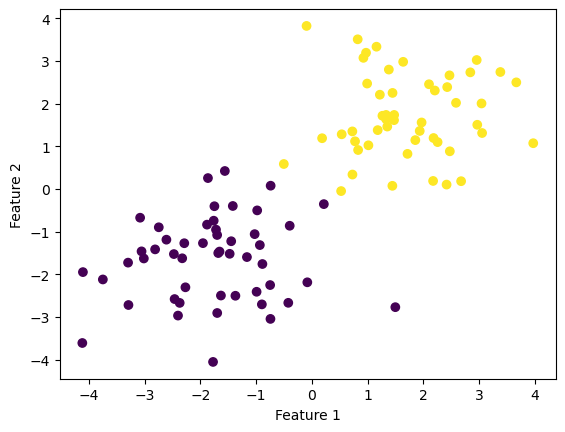

In [112]:
n = 100
p_features = 2

X, y = make_blobs(n_samples = n, n_features = p_features, centers = [(-1.75, -1.75), (1.75, 1.75)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

As shown in the graph, it looks like the points could be separated by a line so that all the purple points, whose label would be "0," are on one side of the line and all the yellow points, whose label would be "1," are on the other side of the line.

When we run our Perceptron `fit` method on this data, we can inspect it's history of scores. We see that over time the score flucuated as `w` was adjusted, but it eventually reaches 100% classification. This means that the fit method eventually found the variable of weights that would allow it to create a linear separator on the given data. 

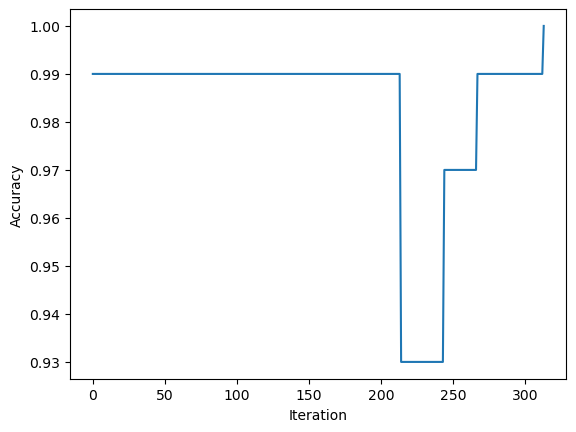

In [113]:
p = Perceptron()
p.fit(X, y)
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

When we then graph our line using the weights our Perceptron `fit` method found, we see that our algorithm was indeed able to separate the data into their respective labels. 

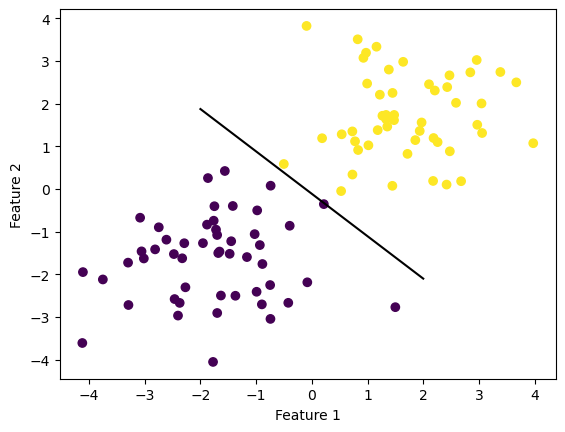

In [114]:
fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

### Not Linearly Separable 2D Data

Here is another data set of two distinct groups with 2 features. 

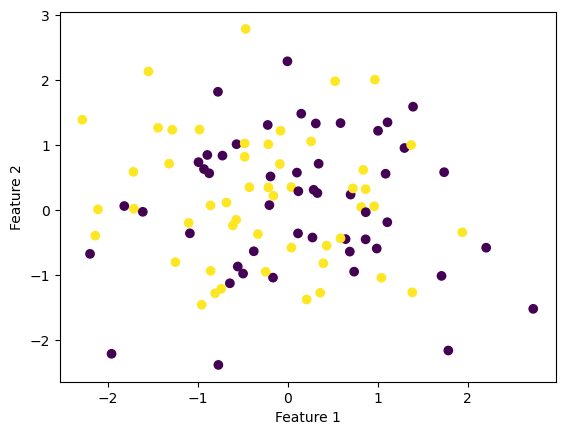

In [115]:
n = 100
p_features = 2

X, y = make_blobs(n_samples = n, n_features = p_features, centers = [(0, 0), (0, 0)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

This time, however, it does not look like we can separate the purple and yellow points from each other. Since the data points overlap, it does not look like a linear separator could separate the points into their respective labels. 

When looking at this set's history of scores, we see that it too flucates. This time, however, we see that the score never reaches 1, in other words, it does not reach 100% classification. Instead, it eventually reaches the max number of times we'll adjust `w`. While the Perceptron `fit` method still stores the last value of weights in the object, it communicates that it is not accurate as it gives the warning that the data was unable to converge. 

/Users/katiemacalintal/Desktop/Machine Learning/KatieMacalintal.github.io/posts/perceptron/perceptron.py:51: UserWarning: WARNING: Could not converge
  warnings.warn("WARNING: Could not converge")


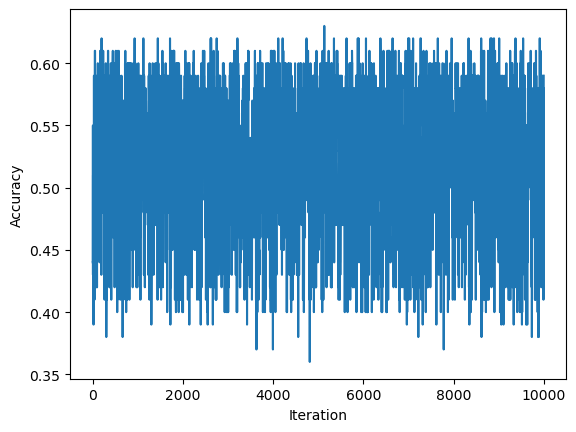

In [116]:
p = Perceptron()
p.fit(X, y)
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

When we then graph our line using the weights the final iteration of our Perceptron `fit` method found, we see that, as expected, our algorithm was not able to separate the data into their expected labels. *(Note: The scale of the axis may also look different)*

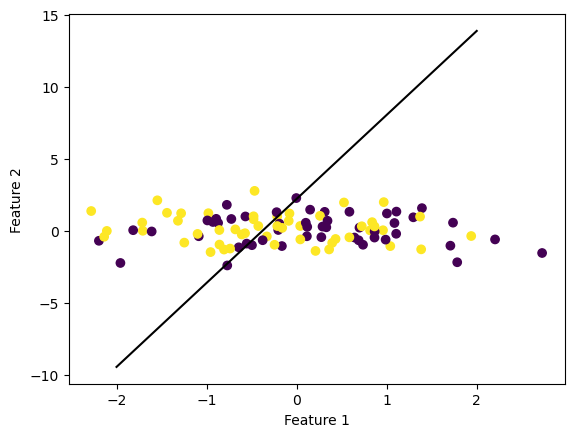

In [117]:
fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

### More Than 2-Dimensions 
Our perceptron algorithm can also work in more than 2 dimensions. This time we've created a data set of two distinct groups with 7 features.

In [118]:
n = 100
p_features = 7
X, y = make_blobs(n_samples = n, n_features = p_features, centers = [(-1, -1, -1, -1, -1, -1, -1), (1, 1, 1, 1, 1, 1, 1)])

Since this is difficult to visualize, we will only be inspecting its history of scores. As we can see in the chart, our new data set is linearly separable as the score eventually reaches 1. 

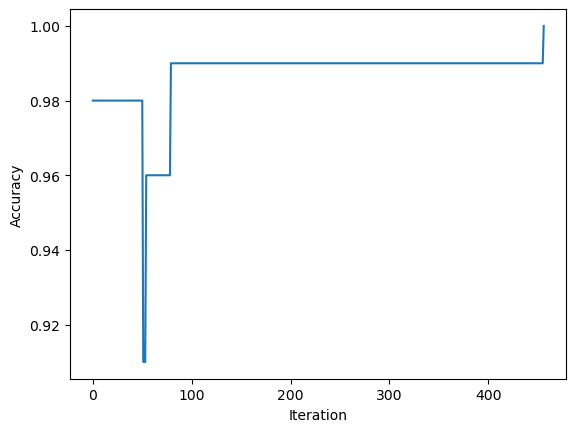

In [119]:
p = Perceptron()
p.fit(X, y)
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

We can also alter this data set, so that the two groups overlap. 

In [120]:
n = 100
p_features = 7
X, y = make_blobs(n_samples = n, n_features = p_features, centers = [(10, 10, 10, 10, 10, 10, 10), (10, 10, 10, 10, 10, 10, 10)])

As we can see by inspecting the history of scores and the warning that is thrown, our data set never converges. 

/Users/katiemacalintal/Desktop/Machine Learning/KatieMacalintal.github.io/posts/perceptron/perceptron.py:51: UserWarning: WARNING: Could not converge
  warnings.warn("WARNING: Could not converge")


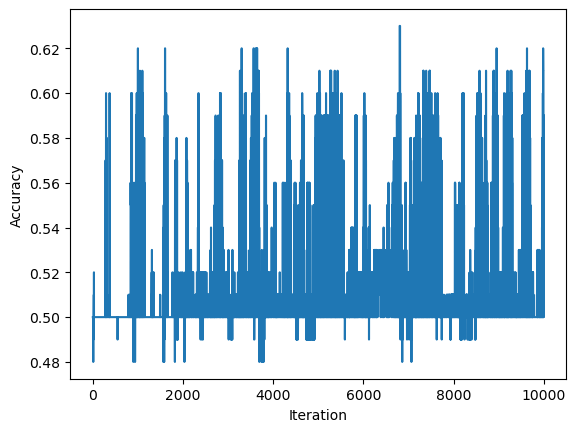

In [121]:
p = Perceptron()
p.fit(X, y)
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

## Runtime Analysis 

In the context of a single iteration of the perceptron algorithm update, I think the runtime complexity of our algorithm would depend on $p$, the number of features. The operation that I think take the longest time would be ${\langle \tilde{w}^{(t)}, \tilde{x}_i\rangle}$, which I think takes $O(p)$ time. There is other multiplication and addition that takes place in this equation, but since it happens consecutively it won't matter at a larger scale. Thus, I think that runtime of the update would be $O(p)$. 